In [1]:
# Step 1: Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Step 2: Unzip the ACL Anthology dataset
!unzip /content/gdrive/MyDrive/Abstracts.zip


Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/Abstracts.zip
  inflating: Abstracts.xlsx          
  inflating: Book1.xlsx              


In [2]:
# Step 3: Import necessary libraries
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Download necessary nltk packages
nltk.download('stopwords')
nltk.download('punkt')

# Step 3.1: Load the dataset
df = pd.read_excel('Book1.xlsx')  # Update with the appropriate dataset file

# Step 3.2: Preprocessing and segmentation
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df['Abstract'] = df['Abstract'].astype(str)  # Convert the 'abstract' column to string type
df['Abstract'] = df['Abstract'].apply(preprocess_text)
df['Introduction'] = df['Introduction'].astype(str)  # Convert the 'abstract' column to string type
df['Introduction'] = df['Introduction'].apply(preprocess_text)
df['Conclusion'] = df['Conclusion'].astype(str)  # Convert the 'abstract' column to string type
df['Conclusion'] = df['Conclusion'].apply(preprocess_text)

# Step 3.3: Tokenization and vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.iloc[:,3])
y = df['Overall Sentiment']
# Step 3.4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the labels
label_encoder.fit(["Positive", "Negative"])
classes_ = ["Positive", "Negative"]
# Encode the labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Determine the number of classes
num_classes = len(label_encoder.classes_)

# Compile the model with the modified output layer and Sparse Categorical Cross-Entropy loss
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 4/10
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.2812 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.4062 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 6/10
1/1 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 7/10
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.1562 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 8/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.2812 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 9/10
1/1 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val

In [4]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)


1/1 [==============================] - 0s 89ms/step
Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.00      0.00      0.00         7

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               379136    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 387,457
Trainable params: 387,457
Non-trainable params: 0
_________________________________________________________________


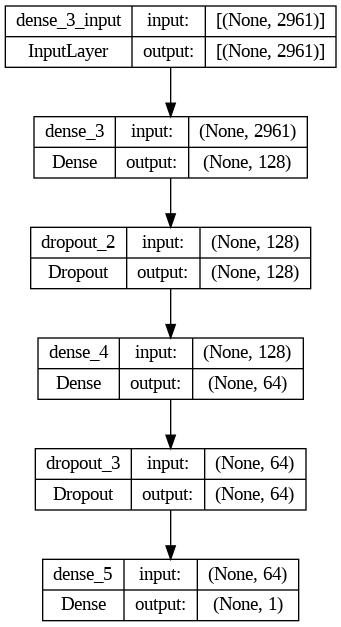

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes = True)